## 분산분석
- 두 개 이상의 집단에서 그룹 평균 간 차이를, 그룹 내 변동에 비교하여 분석
- **두 개 이상 집단들의 평균 간 차이에 대한 통계정 유의성을 검증 (두 개 이상 집단들의 평균을 비교)**

| **구분** | **명칭** | **설명변수 개수** | **반응변수 개수** |
| -- | -- | -- | -- |
| 단일변량 분산분석 | 일원배치 분산분석 (One-way ANOVA) | 1개 | 1개 | 
|  | 이원배치 분산분석 (One-way ANOVA) | 2개 | 1개  |
|  | 다원배치 분산분석 (Multi-way ANOVA) | 3개 이상 | 1개 |
| 다변량 분산분석 | MANOVA | 1개 이상| 2개 이상|

### 
### 일원배치 분산분석 (One-way ANOVA)
- **분산분석에서 반응값에 대한 하나의 범주형 변수의 영향을 파악**
- 모집단 수에는 제한 없으며, 각 표본의 수는 같지 않아도 된다
- **F검정 통계량 이용**
- **가정 : 각 집단의 측정치는 서로 독립성과 정규성을 만족 / 각 집단의 등분산성**


### 
### 분산분석표

| **요인** | **제곱합(SS)** | **자유도(df)** | **평균제곱(MS)** | **분산비(F)** | 
| -- | -- | -- | -- | -- | 
| 처리 | SSA | k-1 | MSA | F = MSA / MSE | 
| 오차 | SSE | N-k | MSE |  | 
| 전체 | SST | N-1 |  |  | 

- **SSA (집단이 가지는 변동제곱합) : $n\sum^k_{i=1} (\bar{X}_i- \bar{X})^2$**
- **SSE (집단이 가지는 변동제곱합) : $\sum^k_{i=1} \sum^m_{j=1} (\bar{X}_{ij}- \bar{X}_i)^2$**
- **SST (집단이 가지는 변동제곱합) : $\sum^k_{i=1} \sum^m_{j=1} (\bar{X}_{ij}- \bar{X})^2$**
- **SST = SSA + SSE**
- **MSA : ${{SSA} \over {k-1}}$**
- **k : 집단의 수 / N : 관측 수**

### 

**귀무가설 : k개의 집단 간 모평균에는 차이가 없다 ($\mu_1 = \mu_2 = ... = \mu_k$)**

**대립가설 : k개의 집단 간 모평균이 모두 같다고 할 수 없다**

## 
### 절차
- **집단 간 정규성, 등분산성, 동질성 검정 => 일원배치 분산분석 => 사후분석**




### 
### 1. 동질성 검정
### ```stats::bartlett.test(y ~ x, data)```
- **귀무가설 : 집단 간 분포의 모양이 동질적이다 / 집단 간 분포의 모양이 동질적이지 않다**

In [10]:
library(stats)
library(tidyverse)

In [22]:
unique(iris$Species)

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

In [11]:
stats::bartlett.test(Sepal.Width ~ Species, data = iris)


	Bartlett test of homogeneity of variances

data:  Sepal.Width by Species
Bartlett's K-squared = 2.0911, df = 2, p-value = 0.3515


### 
### 2. 일원배치 분산분석
### &nbsp;&nbsp; 2-1. 정규성 만족시 => ```aov(y ~ x, data)```
### &nbsp;&nbsp; 2-2. 정규성 불만족시 => ```kruskal.test(y ~ x, data)```

In [13]:
result <- aov(Sepal.Width ~ Species, data = iris) 
result %>% summary

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  11.35   5.672   49.16 <2e-16 ***
Residuals   147  16.96   0.115                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

- p < 0.05 => Species별 Sepal.Width의 평균은 통계적으로 유의한 차이가 있다

### 
### 3. 사후검정 : 귀무가설 기각시, 어떤 집단들에 대해 평균의 차이가 존재하는지 파악
### ```TukeyHSD(x, conf.level)```
- ```x``` : **분산분석의 결과**
- **모든 집단 수준에 대해, 두 집단씩 짝을 지어 각각 다중비교**

**귀무가설 : 집단들 사이의 평균은 같다 / 대립가설 : 집단들 사이의 평균은 같지 않다**

In [14]:
TukeyHSD(result)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sepal.Width ~ Species, data = iris)

$Species
                       diff         lwr        upr     p adj
versicolor-setosa    -0.658 -0.81885528 -0.4971447 0.0000000
virginica-setosa     -0.454 -0.61485528 -0.2931447 0.0000000
virginica-versicolor  0.204  0.04314472  0.3648553 0.0087802


- **Species변수의 virginica, versicolor 범주간 평균의 차이가 존재**

### 
### 이원배치 분산분석 (Two-way ANOVA)
- **분산분석에서 반응값에 대해 두 개의 범주형 변수의 영향을 파악하기 위해 사용**
- **두 변수 사이에 상관관계가 있는지 탐색하는 교호작용 (두 범주형 변수들의 조합으로 인해 반응변수에 미치는 특별한 영향)에 대한 검증이 반드시 진행**
- **가정 : 각 집단 측정치의 분포는 정규성을 만족 / 집단 간 측정치는 등분산성 만족**
### 
#### 주효과 : 각각의 설명변수가 반응변수에 미치는 효과
#### 교호작용효과 : 여러 설명변수들의 조합이 반응변수에 주는 영향
#### 교호작용효과 검정 : 한 설명변수가 반응변수에 미치는 영향이, 다른 설명변수의 수준에 따라서 달라지는지 분석
- **두 설명변수 사이에 상관관계가 존재할 경우 => 교호작용 존재 / 교호작용이 없을 경우 => 주효과 검정**
### 
### 분산분석표 

| **요인** | **제곱합** | **자유도** | **평균제곱합** | **F** |
| -- | -- | -- | -- | -- |
| 요인A | $$SS_A$$ | $$I-1$$ | $$MS_A = {{SS_A} \over {I-1}}$$ | $$F_A = {{MS_A} \over {MSE}}$$ |
| 요인A | $$SS_B$$ | $$J-1$$ | $$MS_B = {{SS_B} \over {J-1}}$$ | $$F_A = {{MS_B} \over {MSE}}$$ |
| 요인A | $$SS_{AB}$$ | $$(I-1)(J-1)$$ | $$MS_{AB} = {{SS_{AB}} \over {(I-1)(j-1)}}$$ | $$F_{AB} = {{MS_{AB}} \over {MSE}}$$ |
| 오차 | $$SSE$$ | $$IJ(n-1)$$ | $$MSE = {{SSE} \over {IJ(n-1)}}$$ |  |
| **전체** | **$$SST$$** | **$$IJn-1$$** |  |  |

- **$SST$ : 총 제곱합**
- **$SS_A$ : 요인A의 범주별 평균값들 사이의 제곱합**
- **$SS_B$ : 요인B의 범주별 평균값들 사이의 제곱합**
- **$SSE$ : 오차제곱합**
- **$I$ : 요인A의 범주 수 / $J$ : 요인B의 범주 수**

## 


**귀무가설**
1. $A$ 변수에 따른 반응변수의 값(반응값)에는 차이가 없다
2. $B$ 변수에 따른 반응변수의 값(반응값)에는 차이가 없다
3. $A$와 $B$ 변수의 상호작용 효과가 없다

**대립가설**
1. $A$ 변수에 따른 반응변수의 값(반응값)에는 차이가 있다
2. $B$ 변수에 따른 반응변수의 값(반응값)에는 차이가 있다
3. $A$와 $B$ 변수의 상호작용 효과가 있다


In [19]:
data <- mtcars %>% mutate(cyl = as.factor(cyl),
                          am = as.factor(am)) %>% 
    select(c("cyl", "am", "mpg"))

### 
### ```aov(y ~ x, data)```

In [21]:
result <- aov(mpg ~ cyl * am, data = data) 
result %>% summary

            Df Sum Sq Mean Sq F value   Pr(>F)    
cyl          2  824.8   412.4  44.852 3.73e-09 ***
am           1   36.8    36.8   3.999   0.0561 .  
cyl:am       2   25.4    12.7   1.383   0.2686    
Residuals   26  239.1     9.2                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

- **cyl변수의 p < 0.05 => 주효과 검정에서 귀무가설 기각 => cyl변수에 따른 mpg의 평균간 차이는 통계적으로 유의**
- **am변수의 p > 0.05 => 주효과 검정에서 귀무가설 채택 => am변수에 따른 mpg간 평균의 차이는 존재하지 않음**
- **cyl:am의 p > 0.05 => 교호작용효과 검정에서 귀무가설 채택 => cyl변수와 am변수의 교호작용은 존재하지 않음**

### 
### ```interaction.plot(x.factor, trace.factor, response)``` : 상호작용 그래프 생성

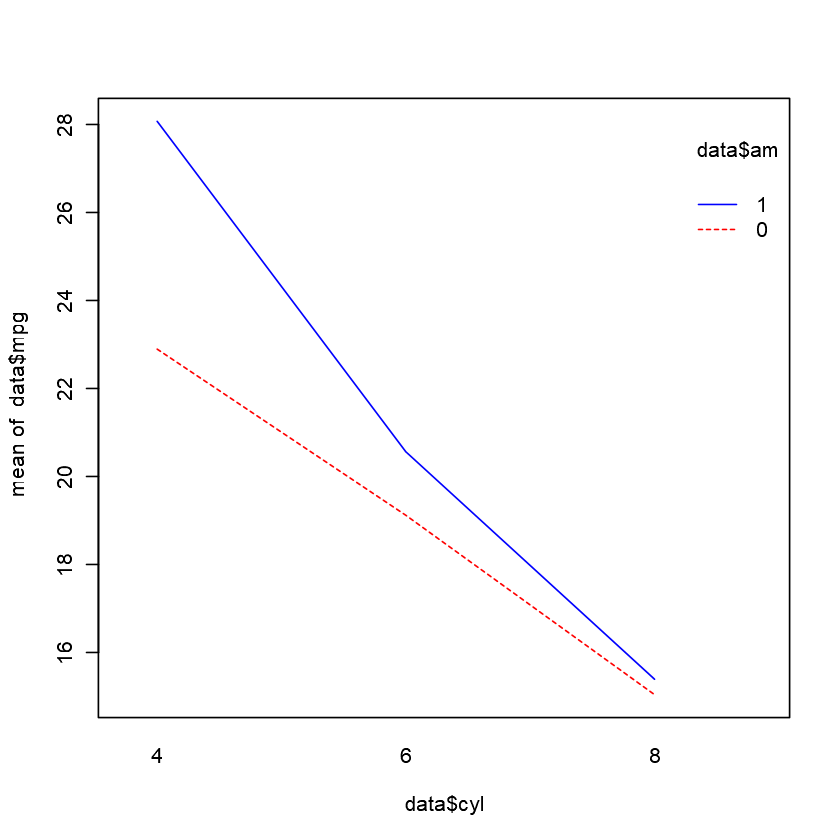

In [33]:
interaction.plot(data$cyl, data$am, data$mpg, col = c("red", "blue"))

## 
## 상관분석
- **두 변수 간 관계의 정도 분석**
- 단위에 의존하지 않는 상관관계를 나타내는 지표
- 공분산은 각 데이터의 단위를 데이터를 곱한 것 => 공분산을 각 데이터의 표준편차로 나눔

### 상관계수 $\gamma = {{cov(x, y)} \over {S_x \times S_y}} = {{\sum^n_{i=1} [(x-\bar{x})(y - \bar{y})]} \over {n(S_x \times S_y)}}$

## 
#### 피어슨 상관계수 
- **두 연속형 자료가 모두 정규성을 따른다는 가정 하에 선형적 상관관계를 측정 (-1 ~ 1)**

#### 스피어만 상관계수
- **두 변수가 정규성을 만족하지 않는 경우, 혹은 변수 순위 및 순서 형태로 주어지는 경우 사용**
- **실제 값을 사용하는 대신 데이터에 순위를 매긴 후, 그 순위에 대한 상관계수를 산출하는 비모수적 방법**
- **피어슨 상관계수와 달리 비선형 관계의 연관성을 파악, 이산형 혹은 순서형 자료에 적용 가능 (-1 ~ 1)**

#### 켄달 순위상관계수
- 데이터가 $(X_i, Y_i)$와 같이 순서쌍으로 주어져있을 때, $X_i$가 커짐에 따라 $Y_i$도 커질 경우를 부합
- $X_i$가 커짐에 따라 $Y_i$가 작아질 경우를 비부합
- **전체 데이터에서 비부합쌍에 대한 부합쌍의 비율**
- **순위상관계수가 1일경우 데이터에서 부합쌍의 비율이 100%임을 의미 (-1 ~ 1)**

### 
### ```cor(x, y, method, use)``` : 상관계수 계산
- ```method``` : 상관계수 유형 ("pearson", "kendall", "spearman")
- ```use``` : 결측치 처리 방법 

    ("everything" : 결측치 존재시 NA출력 / "all.obs" : 결측치 존재시 오류 메시지 / "complete.obs" : 변수별 결측값을 제외하고 계산 / "pairwise.complete.obs" : 모든 변수 쌍에서 결측값이 없는 데이터들에 대해 상관계수 계산)

In [37]:
data(airquality)
air <- airquality[, c(1:4)]
cor(air, use = "pairwise.complete.obs", method = "pearson")

,Ozone,Solar.R,Wind,Temp
Ozone,1.0000000,0.34834169,-0.60154653,0.6983603
Solar.R,0.3483417,1.00000000,-0.05679167,0.2758403
Wind,-0.6015465,-0.05679167,1.00000000,-0.4579879
Temp,0.6983603,0.27584027,-0.45798788,1.0000000


### 
### 상관계수 검정 : 변수 간 상관계수에 대해 추정 / 검정
### ```cor.test(x, y, alternative, method)```

#### 귀무가설 : 변수1과 변수2 간에는 상관관계가 없다
#### 대립가설 : 변수1과 변수2 간에는 상관관계가 있다

In [41]:
cor.test(air$Ozone, air$Wind, method = "pearson")


	Pearson's product-moment correlation

data:  air$Ozone and air$Wind
t = -8.0401, df = 114, p-value = 9.272e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7063918 -0.4708713
sample estimates:
       cor 
-0.6015465 


### 
### 상관계수 시각화
### ```pairs(corr)```  
### ```corrgram::corrgram(data, upper.panel, lower.panel)```
### ```PerformanceAnalytics::chart.Correlation(data, histogram = , pch = "+")```

In [ ]:
cor(air, use = "pairwise.complete.obs", method = "pearson") %>% pairs
library(corrgram)
corrgram::corrgram(air, upper.panel = panel.conf)
library(PerformanceAnalytics)
chart.Correlation(air, histogram = , pch = "+")

### 
### Run 검정 : 이진 패턴의 랜덤성 검정
### ```DescTools::RunsTest(data)```

### 귀무가설하 통계량
### $평균 = {{(2ab)}\over {(a+b)}}+1 \;\;\;분산 = {{2ab(2ab - a - b)} \over {(a+b)^2 (a+b-1)}}$ 
- **a : 패턴상 a의 개수 / b : 패턴상 b의 개수**

#### 귀무가설 : 연속적인 구매패턴이 임의적이다 (두 상품의 연관이 없다)
#### 대립가설 : 연속적인 구매패턴이 임의적이지 않다 (두 상품의 연관이 있다)


### 
- 평균, 표준편차

In [58]:
data <- c(0,0,1,1,0,0,0,0,1,1,1,1,0,1,0,0,1,1,0,0,1,1,1,0,0,1,1,0,1)
a = 14 ; b = 15
mu <- ((2 * a * b) / (a + b)) + 1
var <- (2*a*b*(2*a*b - a - b)) / {(a + b)^2 * (a + b - 1)}
mu ; sqrt(var)

[1] 15.48276

[1] 2.640803

In [59]:
library(DescTools)
DescTools::RunsTest(data)


	Runs Test for Randomness

data:  data
runs = 14, m = 14, n = 15, p-value = 0.7058
alternative hypothesis: true number of runs is not equal the expected number


- P-value > 0.05 => 귀무가설 기각불가 => 연속적인 구매패턴이 임의적

### 
### 회귀분석 가정
1. **선형성 : 설명변수와 반응변수가 선형적 관계**
2. **등분산성 : 잔차의 산점도가, 설명변수 값에 관계없이 일정**
- 등분산성 불만족의 산점도 형태 : 설명변수가 커질수록 분산이 감소 / 발굽형 (n자 모양) : 2차항 설명변수가 필요 / 대각선 모양 : 새로운 설명변수 필요)

3. **정규성 : 잔차가 정규성을 만족 (Q-Q Plot상 대각방향의 직선)**

### 
### 선형회귀모형 진단

In [62]:
data(Cars93, package = "MASS")

In [63]:
Cars93_lm <- lm(Price ~ EngineSize, Cars93)

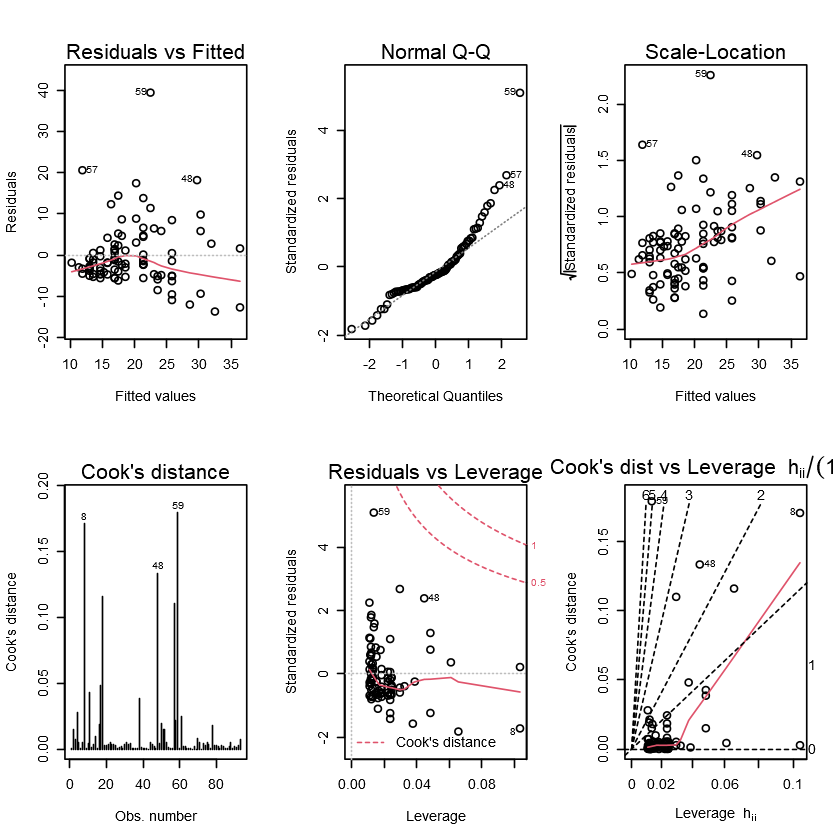

In [72]:
par(mfrow = c(2, 3))
plot(Cars93_lm, which = c(1:6))

#### 1) Residuals vs Fitted
- x축은 적합값, y축은 잔차
- **선형회귀모형은 오차의 정규성을 가정 => 그래프에서 오차의 분포는 기울기가 0인 직선의 형태를 가지는 것이 이상적**

#### 2) Normal Q-Q 
- 표준화된 잔차의 확률도
- **정규성 가정 만족시 => 그래프의 점들은 대각방향 직선형태**

#### 3) Scale-Location
- x축은 적합값, y축은 표준화 잔차
- **기울기가 0인 직선의 형태를 가지는 것이 이상적**
- **직선에서 멀리 떨어진 점이 있다면, 그 지점에서 회귀모형이 y값을 잘 예측하지 못함을 나타냄 (해당 지점은 이상치)**

#### 4) Cook's distance
- x축은 관측값을 순섣로 나열, y축은 해당지점의 쿡의 거리
- **쿡의거리 : 한 관측치가 회귀모형에 미치는 영향을 나타냄 (1이상일 경우 매우 큰 영향을 주는 관측치)**

#### 5) Residuals vs Leverage
- x축은 레버리지, y축은 표준화 잔차
- **레버리지 : 관측치가 다른 관측치 집단으로부터 떨어진 정도, 설명변수가 극단에 치우쳐져 있는지의 정도**
- **그래프 상단과 하단에는 쿡의 거리가 붉은 선으로 표현**
- **쿡의 거리가 0.5이상인 붉은 점선 밖에 있는 점은 예측치를 크게 벗어난 관측치**

#### 6) Cook's dist vs Leverage
- x축은 레버리지, y축은 쿡의 거리
- 레버리지와 쿡의 거리는 비례